### Kulak & Grondin Example 8.2
This example is from "*Limit States Design in Structural Steel*", Ninth Edition, CISC, by Kulak and Grondin.
This example is slightly modified in order to compare the results with 
[that obtained](../../slope-deflection/KG-Example-8.2.ipynb) using
the method of slope-deflection.  The modifications
to the model are:
* a pin is inserted at the top of columns JK and IG, with the result that column stacks JKL and IGH
offer no lateral resistance (in the original K&G example, the columns are continuous and there is a very
small horizontal reaction at the base of those two columns).
* the cross-sectional areas of all members are made very large so as to make axial
changes in length neglible.

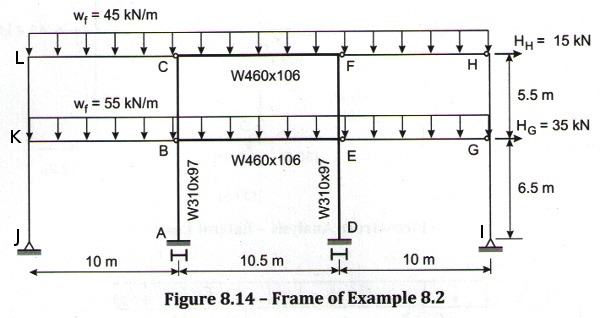

In [1]:
from Frame2D import Frame2D
from IPython import display
display.Image('data/KG82.d/KG82a.jpg')

The *notional* lateral loads of 6.9 kN at node **H** and 8.4 kN at node **G**
are added as [before](ZZ-test-KG82.ipynb).

In [2]:
frame = Frame2D('KG82sd')
frame.input_all()

In [3]:
RS = frame.solve('all')
frame.write_results(frame.dsname,RS)
frame.print_input()
frame.print_results(RS)


Frame KG82sd:


              # of nodal degrees of freedom: 36
  # of constrained nodal degrees of freedom: 10
# of unconstrained nodal degrees of freedom: 26  (= degree of kinematic indeterminacy)

                               # of members: 14
                             # of reactions: 10
                                 # of nodes: 12
                            # of conditions: 10
           degree of statical indeterminacy: 6



Nodes:

Node          X         Y  Constraints  DOF #s
----      -----     -----  -----------  ------
A         10000         0  FX,FY,MZ     26,27,28
B         10000      6500               0,1,2
C         10000     12000               3,4,5
D         20500         0  FX,FY,MZ     29,30,31
E         20500      6500               6,7,8
F         20500     12000               9,10,11
G         30500      6500               12,13,14
H         30500     12000               15,16,17
I         30500         0  FX,FY        32,33,18
J             0         

### Compare with results from slope-deflection

In [4]:
import pandas as pd

BM = [('AB', -49.9080183705027, 47.4941396356060),   # results from method of slope deflection
     ('BC', 250.526060428376, 252.096857589821),
     ('DE', -189.782099213905, -232.254022051198),
     ('EF', -290.011616822927, -333.061301195269),
     ('BE', -298.020200063982, 522.265638874126),
     ('CF', -252.096857589821, 333.061301195269)]

SD = pd.DataFrame({m:{'MZJ':-a,'MZK':-b} for m,a,b in BM}).T
SD

,MZJ,MZK
AB,49.908018,-47.494140
BC,-250.526060,-252.096858
BE,298.020200,-522.265639
CF,252.096858,-333.061301
DE,189.782099,232.254022
EF,290.011617,333.061301


In [5]:
# get our member end forces for the same members
HERE = pd.DataFrame([(m.id,ef.m2/1e6,ef.m5/1e6) 
                     for m,ef in RS.member_efs.items()],columns=['ID','MZJ','MZK']).set_index(['ID'])
HERE = HERE.loc[SD.index]
HERE

,MZJ,MZK
AB,49.908016,-47.494142
BC,-250.526062,-252.096860
BE,298.020204,-522.265634
CF,252.096860,-333.061295
DE,189.782100,232.254024
EF,290.011610,333.061295


#### % Difference in End Moments

In [6]:
pd = (100*(SD-HERE)/HERE).round(6)
pd

,MZJ,MZK
AB,0.000006,-0.000005
BC,-0.000001,-0.000001
BE,-0.000001,0.000001
CF,-0.000001,0.000002
DE,-0.000000,-0.000001
EF,0.000002,0.000002


Max. difference is 0.000006%, which is quite good.

In [7]:
pd.abs().max()

MZJ    0.000006
MZK    0.000005
dtype: float64